In [ ]:
!pip install numpy pandas matplotlib seaborn plotly.express keras nltk

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


# Import librerie e definizione funzioni

In [ ]:
import math
import random
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import seaborn as sns
from datetime import datetime, timedelta
import time
from PIL import Image

import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer 
import gensim

plt.style.use('classic')
%matplotlib inline

sns.set()
#from google.colab import drive
#drive.mount('/gdrive')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aine2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aine2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aine2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\aine2\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
def text_with_nltk(df_colonna_testo,nome_mese, pos=None):

  stop_words=set(stopwords.words("english"))
  stop_words.update(['co' , 'k', 'c', 'h', 'x', 'r', 'l','u','b', 'p','n'])
  punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~...'s|`` ’'''

  
  #unisco il testo di tutti i tweet
  all_tweet=""

  for tweet in df_colonna_testo:
    all_tweet+=' '+tweet.lower()

  #all_tweet_no_emoji=remove_emoji(all_tweet) # cancellazione delle emoji e degli stickers

  tokenized_text = nltk.word_tokenize(all_tweet) # split delle singole parole

  filtered_sent=[] 
  for w in tokenized_text:
      if w not in stop_words and w not in punc:
          filtered_sent.append(w)


  #lemmatizer = WordNetLemmatizer()
  #filtered_sent_lemm = ' '.join([lemmatizer.lemmatize(w, pos ="a") for w in filtered_sent])
  #filtered_sent=nltk.word_tokenize(filtered_sent_lemm)


 
  filtered_sent_corr=[] #essendo presenti stessi elementi con diversi nomi questi vengono rinominati 
  for w in filtered_sent:
      if w=='btc' or w=='bitcoin':
          filtered_sent_corr.append('BITCOIN')
      elif w=='eth' or w=='ethereum':
          filtered_sent_corr.append('ETHEREUM')
      elif w=='doge' or w=='dogecoin':
          filtered_sent_corr.append('DOGECOIN')    
      elif w=='bnb'or w=='binance':
          filtered_sent_corr.append('BINANCE')  
      elif w=='amp':
          filtered_sent_corr.append('AMP')  
      elif w=='xrp':
          filtered_sent_corr.append('XRP')
      elif w=='nft':
          filtered_sent_corr.append('APENFT')
      elif w=='ada':
          filtered_sent_corr.append('CARDANO')   
      elif w=='bsc':
          filtered_sent_corr.append('BOWSCOIN')
      elif w=='cryptocurrency' or w=='cryptocurrencies':
          filtered_sent_corr.append('crypto')
      else:
          filtered_sent_corr.append(w)
          
  print("Mostriamo le prime 10 parole con maggiore frequenza:")
  freq_dist = nltk.FreqDist(filtered_sent_corr)
  print(freq_dist.most_common(10))

  filtered_sent_crypto = [] 

  for elem in filtered_sent_corr: 
    if elem=='BITCOIN' or elem=='ETHEREUM' or elem=='DOGECOIN' or elem=='BINANCE' or elem=='AMP' or elem=='XRP' or elem=='APENFT' or elem=='CARDANO' or elem== 'BOWSCOIN' or elem== 'crypto':
      filtered_sent_crypto.append(elem)

  print("Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.")

  counted = Counter(filtered_sent_crypto)
  word_freq = pd.DataFrame(counted.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)  
  plot=sns.barplot(x='Frequency', y='Word', data=word_freq)
  plt.setp(plot.get_xticklabels(), rotation=45)

  print("\n\n\n")
  
  filtered_sent_no_crypto=[] # elimazione delle diverse valute

  for w in filtered_sent_corr:
      if not w=='BITCOIN' and not w=='ETHEREUM' and not w=='DOGECOIN' and not w=='BINANCE' and not w=='AMP' and not w=='XRP' and not w=='APENFT' and not w=='CARDANO' and not w== 'BOWSCOIN' and not w=='crypto':
          filtered_sent_no_crypto.append(w)

  print("Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:")
  freq_dist = nltk.FreqDist(filtered_sent_no_crypto)
  print(freq_dist.most_common(10))

  print("Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:")

  counted = Counter(filtered_sent_no_crypto)
  counted_2= Counter(ngrams(filtered_sent_no_crypto,2))
  counted_3= Counter(ngrams(filtered_sent_no_crypto,3))
  word_freq = pd.DataFrame(counted.items(),columns=['Word','Frequency']).sort_values(by='Frequency',ascending=False)
  word_pairs =pd.DataFrame(counted_2.items(),columns=['Bigram','Frequency']).sort_values(by='Frequency',ascending=False)
  trigrams =pd.DataFrame(counted_3.items(),columns=['Trigrams','Frequency']).sort_values(by='Frequency',ascending=False)
  fig, axes = plt.subplots(3,1,figsize=(8,20))
  sns.barplot(ax=axes[0],x='Frequency',y='Word',data=word_freq.head(30))
  sns.barplot(ax=axes[1],x='Frequency',y='Bigram',data=word_pairs.head(30))
  sns.barplot(ax=axes[2],x='Frequency',y='Trigrams',data=trigrams.head(30))



  filtered_sent_no_cryptoSTR = ' '.join(map(str, filtered_sent_no_crypto))

  def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

  if pos=='y':
    bitcoin_mask = np.array(Image.open("/gdrive/My Drive/TextAnalytics/risorse/p.png"))
  elif pos=='n':
    bitcoin_mask = np.array(Image.open("/gdrive/My Drive/TextAnalytics/risorse/n.png"))
  else:
    #bitcoin_mask = np.array(Image.open("/gdrive/My Drive/TextAnalytics/risorse/B.png"))
    bitcoin_mask = np.array(Image.open(r"C:\Users\aine2\Downloads\B.png"))


  transformed_bitcoin_mask = np.ndarray((bitcoin_mask.shape[0],bitcoin_mask.shape[1]), np.int32)

  for i in range(len(bitcoin_mask)):
      transformed_bitcoin_mask[i] = list(map(transform_format, bitcoin_mask[i]))
      
  wc = WordCloud(background_color="white", max_words=500, mask=transformed_bitcoin_mask
              )#contour_width=0.001, contour_color='gray'
  wc.generate(filtered_sent_no_cryptoSTR)

  print("\n\n\n")

  plt.figure(figsize=[20,10])
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('WordCloud of {}'.format(nome_mese))
  plt.show()


# Import dataset

In [ ]:
#df_tweets = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_2019.csv")
df_tweets = pd.read_csv(r"C:\Users\aine2\Downloads\df_tweets_2019.csv")
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets = df_tweets.set_index(['date']).sort_index()

df_tweets

,text
date,
2019-05-06 00:00:01,h long btc btc short btc btc ls vs vs
2019-05-06 00:00:01,current prices and changes in the last hour bt...
2019-05-06 00:00:02,binance btt btc npxs btc dent btc bcn btc hot btc
2019-05-06 00:00:03,btc eth etc bch xrp xem lsk mona bitcoin bitfl...
2019-05-06 00:00:05,total market cap btc btc dominance update time...
...,...
2019-09-26 23:59:39,bought lots of bags on sale over the past hour...
2019-09-26 23:59:53,here is my bitcoin prediction of tomorrow pred...
2019-09-26 23:59:55,pay me in bitcoin using my t co pmgta gg t co ...


Andiamo ad analizzare e i testi dei tweet divisi per mesi per poterli confrontare e vedere a seconda del mese quali sono le parole più usate. Prendiamo solo i mesi completi, quindi saltiamo il primo mese.

# Dataset intero

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 3084184), ('crypto', 876422), ('ETHEREUM', 472159), ('usd', 351042), ('blockchain', 289577), ('price', 248250), ('XRP', 219557), ('BINANCE', 162766), ('ltc', 152942), ('market', 133431)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('usd', 351042), ('blockchain', 289577), ('price', 248250), ('ltc', 152942), ('market', 133431), ('trading', 130708), ('buy', 128420), ('money', 121376), ('bch', 119639), ('get', 109524)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:


MemoryError: ignored

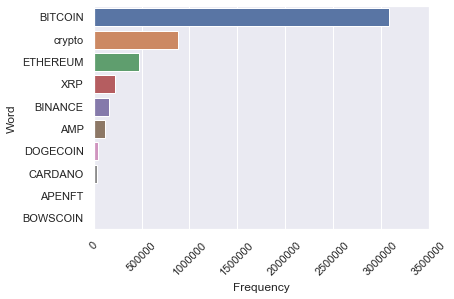

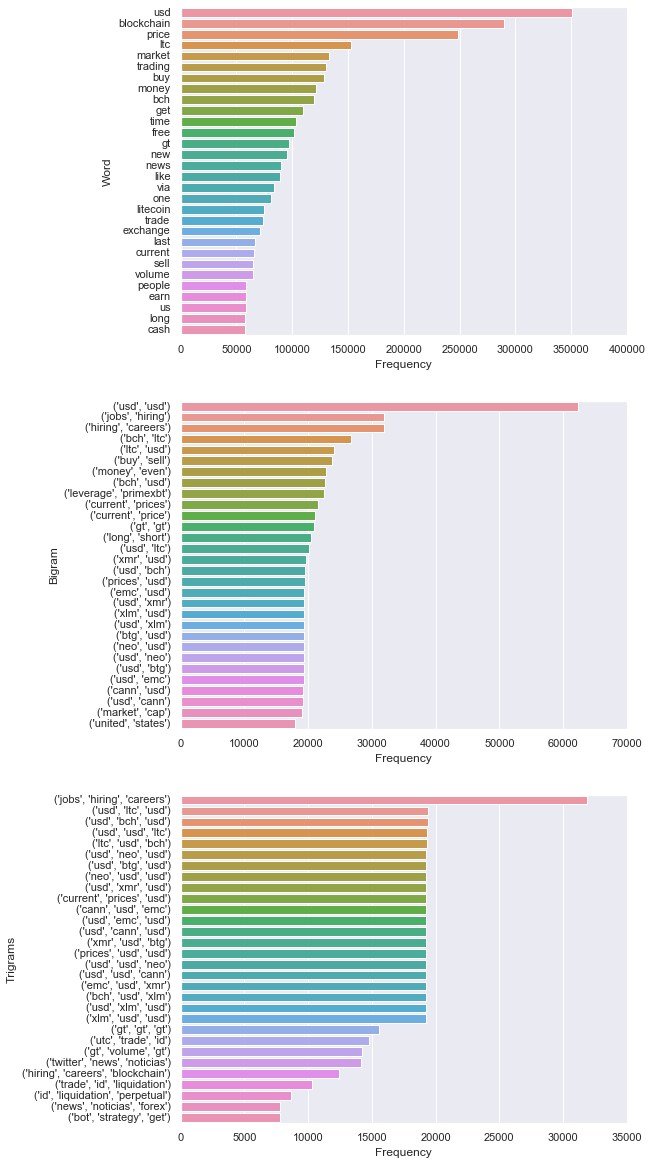

In [ ]:
text_with_nltk(df_tweets['text'], 'whole dataset')

# Maggio

In [ ]:
df_maggio=df_tweets['2019-05-06':'2019-05-31']
df_maggio

,text
date,
2019-05-06 00:00:01,h long btc btc short btc btc ls vs vs
2019-05-06 00:00:01,current prices and changes in the last hour bt...
2019-05-06 00:00:02,binance btt btc npxs btc dent btc bcn btc hot btc
2019-05-06 00:00:03,btc eth etc bch xrp xem lsk mona bitcoin bitfl...
2019-05-06 00:00:05,total market cap btc btc dominance update time...
...,...
2019-05-31 23:59:30,nate will probably copyright the bitcoin white...
2019-05-31 23:59:34,testing the noncustodial button wallet with bc...
2019-05-31 23:59:38,patience is the key bitcoin blockchain


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 540395), ('crypto', 149939), ('ETHEREUM', 84248), ('blockchain', 54536), ('price', 44086), ('XRP', 38675), ('usd', 38601), ('BINANCE', 30202), ('ltc', 25025), ('trading', 24586)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('blockchain', 54536), ('price', 44086), ('usd', 38601), ('ltc', 25025), ('trading', 24586), ('buy', 24117), ('market', 22027), ('money', 20805), ('bch', 20400), ('free', 19125)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






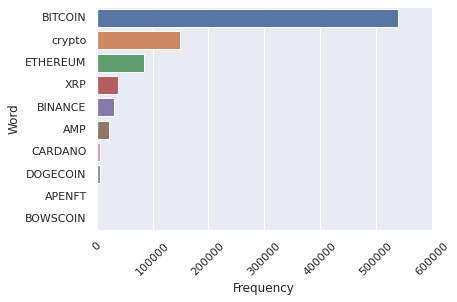

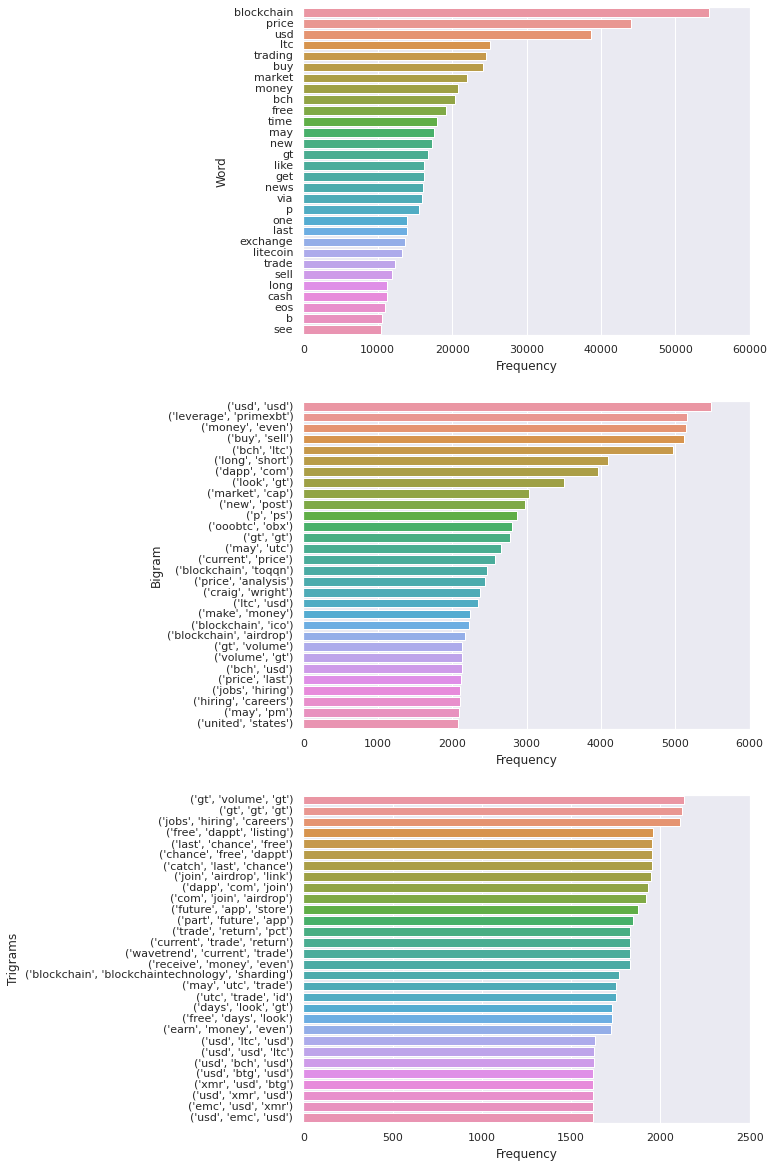

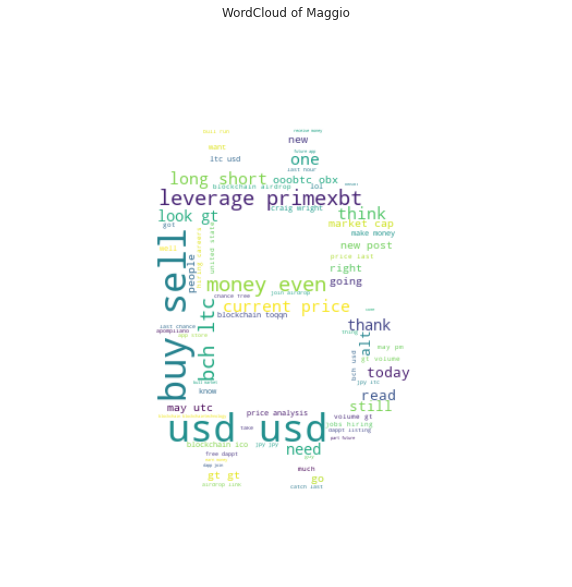

In [ ]:
text_with_nltk(df_maggio['text'], 'Maggio')

# Giugno

In [ ]:
df_giugno=df_tweets['2019-06-01':'2019-06-30']
df_giugno

,text
date,
2019-06-01 00:00:00,is a conservative prediction for bitcoin andyc...
2019-06-01 00:00:00,top cryptocurrency in out update in last hours...
2019-06-01 00:00:01,btc eth ixt bitcoin ethereum ixt cryptocurrency
2019-06-01 00:00:01,the bitcoin btc price is currently usd or eur ...
2019-06-01 00:00:01,bitcoin with unit price of market cap of and h...
...,...
2019-06-30 23:59:36,after the last hour of trading i don t see any...
2019-06-30 23:59:41,move your trading to the crypto exchange today...
2019-06-30 23:59:42,directornola georgeabek thank you do i need to...


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 694291), ('crypto', 191603), ('usd', 112479), ('ETHEREUM', 108647), ('blockchain', 59373), ('XRP', 53380), ('price', 53207), ('ltc', 39997), ('BINANCE', 36971), ('bch', 29331)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('usd', 112479), ('blockchain', 59373), ('price', 53207), ('ltc', 39997), ('bch', 29331), ('buy', 29046), ('market', 28893), ('trading', 28037), ('money', 27578), ('free', 25728)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






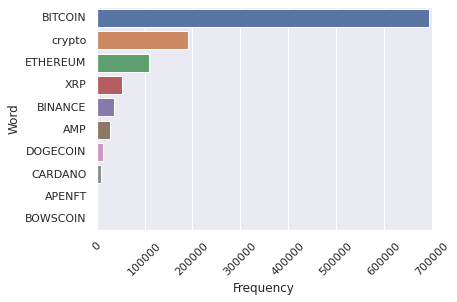

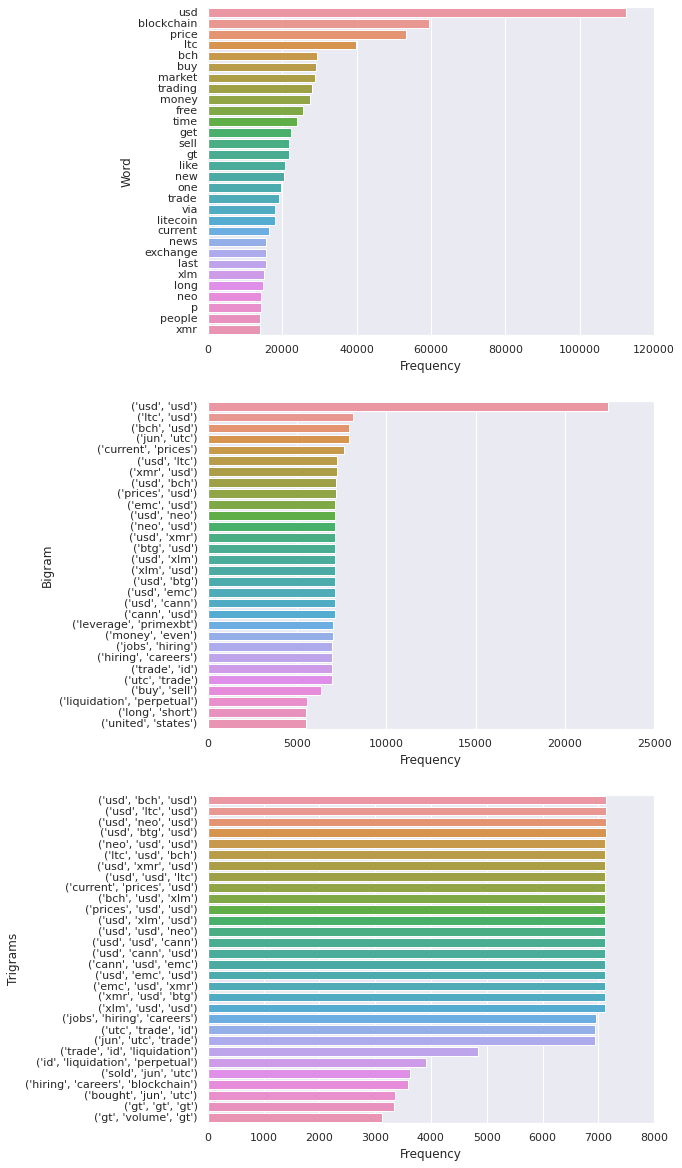

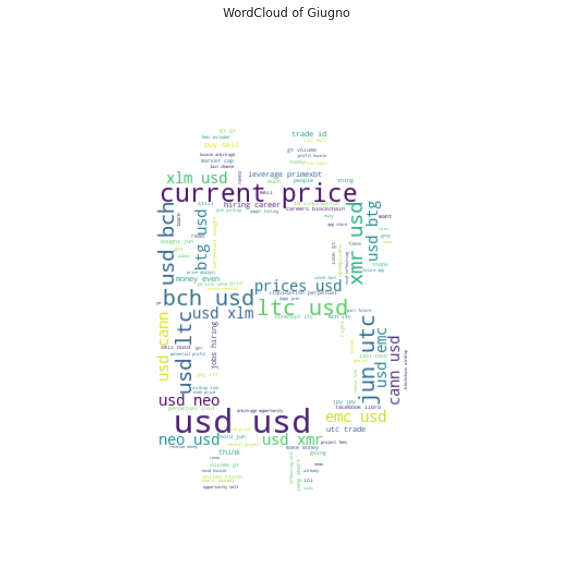

In [ ]:
text_with_nltk(df_giugno['text'], 'Giugno')

#Luglio

In [ ]:
df_luglio=df_tweets['2019-07-01':'2019-07-30']
df_luglio

,text
date,
2019-07-01 00:00:00,jul utc heikin ashi candlesticks on d updated ...
2019-07-01 00:00:01,learn more about bitcoin on our site t co zc o...
2019-07-01 00:00:02,binance qkc selling activity worth btc cryptoc...
2019-07-01 00:00:02,hourlycryptostatus to btc bitcoin usd h eth et...
2019-07-01 00:00:02,volume alert qkc current hr volume is btc and ...
...,...
2019-07-30 23:58:41,us lawmakers are realizing they can t ban bitc...
2019-07-30 23:58:45,new data reveals serious bitcoin warning t co ...
2019-07-30 23:59:00,kingmhyke kingmhyq cryptonightmik bigslut offi...


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 703333), ('crypto', 201228), ('ETHEREUM', 101753), ('usd', 67392), ('blockchain', 61823), ('price', 55704), ('XRP', 47171), ('BINANCE', 37611), ('money', 32813), ('ltc', 32794)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('usd', 67392), ('blockchain', 61823), ('price', 55704), ('money', 32813), ('ltc', 32794), ('market', 30164), ('buy', 29760), ('get', 27373), ('trading', 27370), ('bch', 24862)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






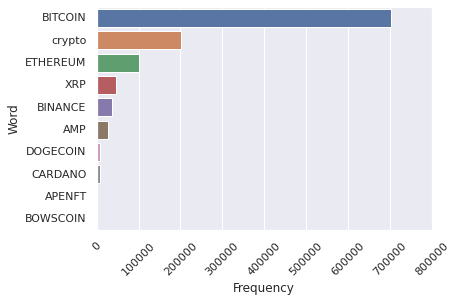

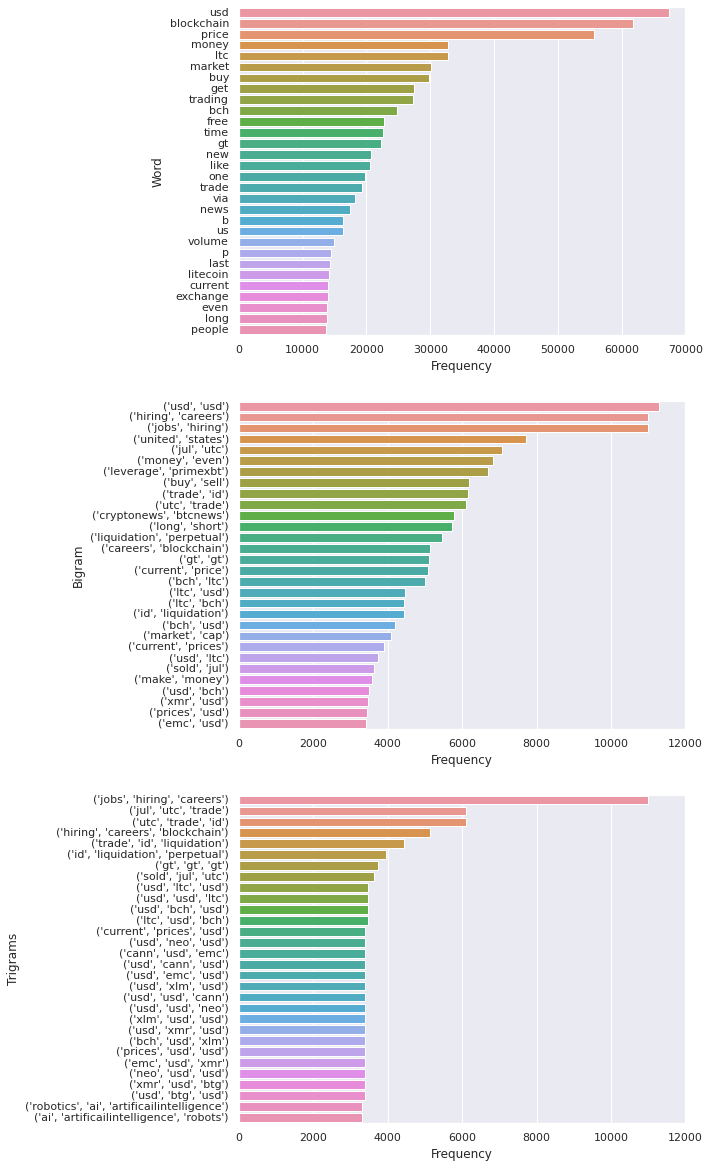

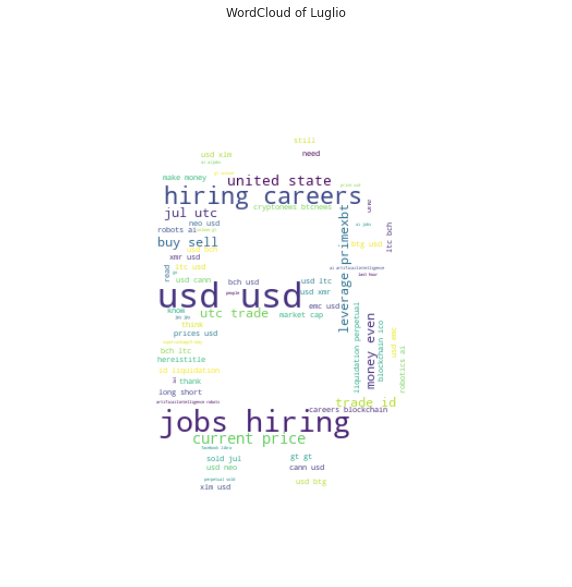

In [ ]:
text_with_nltk(df_luglio['text'], 'Luglio')

# Agosto

In [ ]:
df_marzo=df_tweets['2019-08-01':'2019-08-31']
df_marzo

,text
date,
2019-08-01 00:00:00,bitcoin with unit price of market cap of and h...
2019-08-01 00:00:01,bitcoin btc price change in h market cap ranki...
2019-08-01 00:00:02,t co diubjoo df edt usd btc k ltc bnb trx xlm ...
2019-08-01 00:00:02,learn more about bitcoin on our site t co zc o...
2019-08-01 00:00:02,gnt is now worth and btc gnt t co xeimydkpzo
...,...
2019-08-31 23:59:40,prices update in usdt every hour btc eth xrp t...
2019-08-31 23:59:43,i ve been using coinbase which makes it really...
2019-08-31 23:59:47,hourly price update usdt bsv bitcoin dead fork...


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 616157), ('crypto', 174365), ('ETHEREUM', 94982), ('blockchain', 61945), ('usd', 56234), ('price', 50623), ('XRP', 41083), ('BINANCE', 31132), ('ltc', 29340), ('market', 28571)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('blockchain', 61945), ('usd', 56234), ('price', 50623), ('ltc', 29340), ('market', 28571), ('trading', 26462), ('buy', 24667), ('money', 23356), ('bch', 23161), ('get', 21534)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






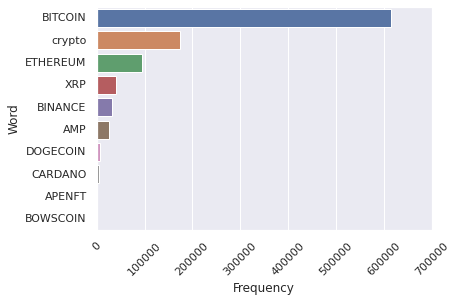

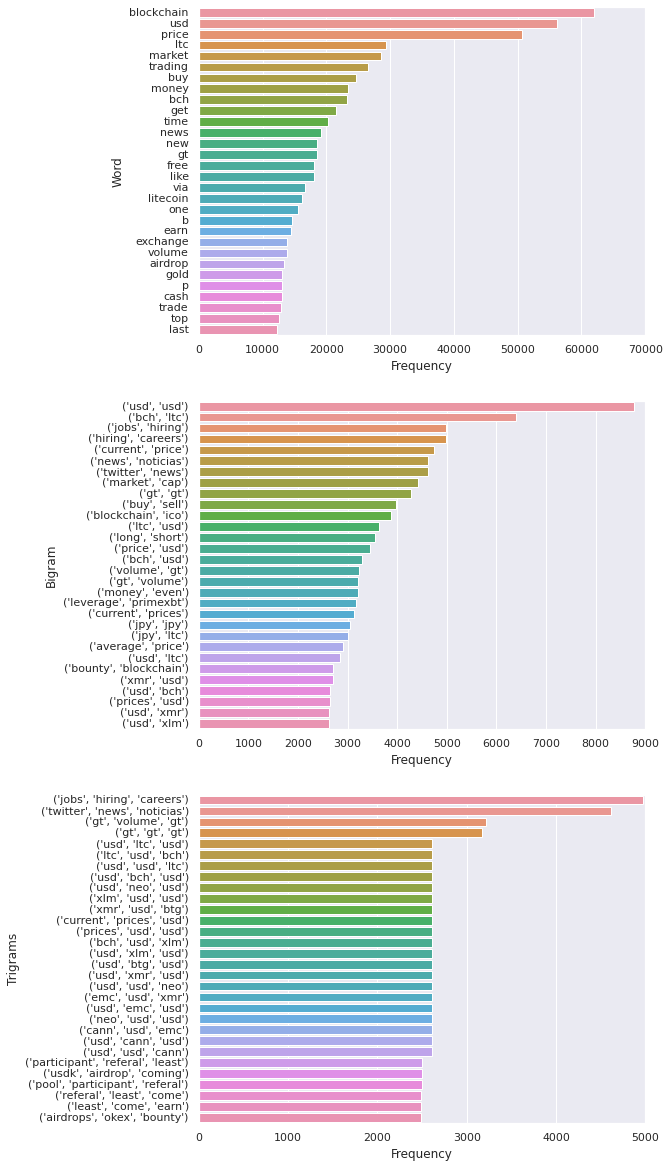

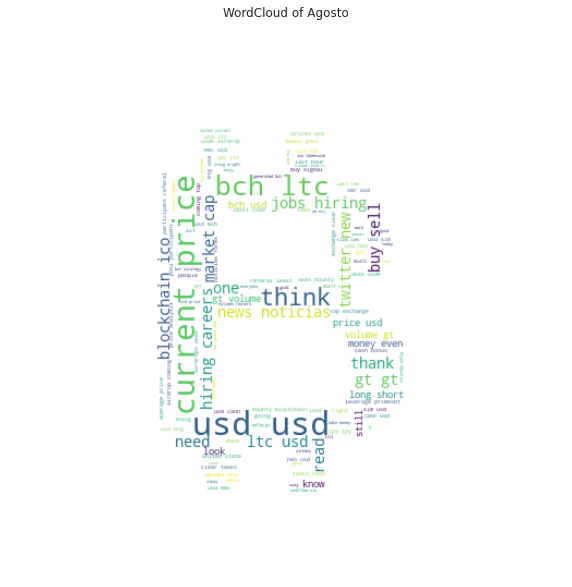

In [ ]:
text_with_nltk(df_marzo['text'], 'Agosto')

# Settembre

In [ ]:
df_aprile=df_tweets['2019-09-01':'2019-09-30']
df_aprile

,text
date,
2019-09-01 00:00:00,btc btc bitcoin s current price h h d more on ...
2019-09-01 00:00:01,bitcoin ble school
2019-09-01 00:00:01,hourlycryptostatus to btc bitcoin usd h eth et...
2019-09-01 00:00:01,bitcoin current price change percent in h
2019-09-01 00:00:02,txs size kb stripped kb time reward btc fees b...
...,...
2019-09-26 23:59:39,bought lots of bags on sale over the past hour...
2019-09-26 23:59:53,here is my bitcoin prediction of tomorrow pred...
2019-09-26 23:59:55,pay me in bitcoin using my t co pmgta gg t co ...


Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 508802), ('crypto', 152849), ('ETHEREUM', 79213), ('usd', 74558), ('blockchain', 49645), ('price', 42966), ('XRP', 37689), ('BINANCE', 25670), ('ltc', 24719), ('trading', 23190)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('usd', 74558), ('blockchain', 49645), ('price', 42966), ('ltc', 24719), ('trading', 23190), ('market', 22770), ('get', 21281), ('bch', 21115), ('news', 20710), ('buy', 20037)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






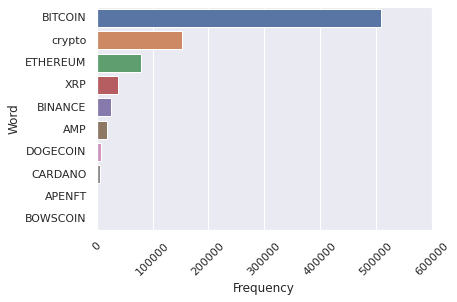

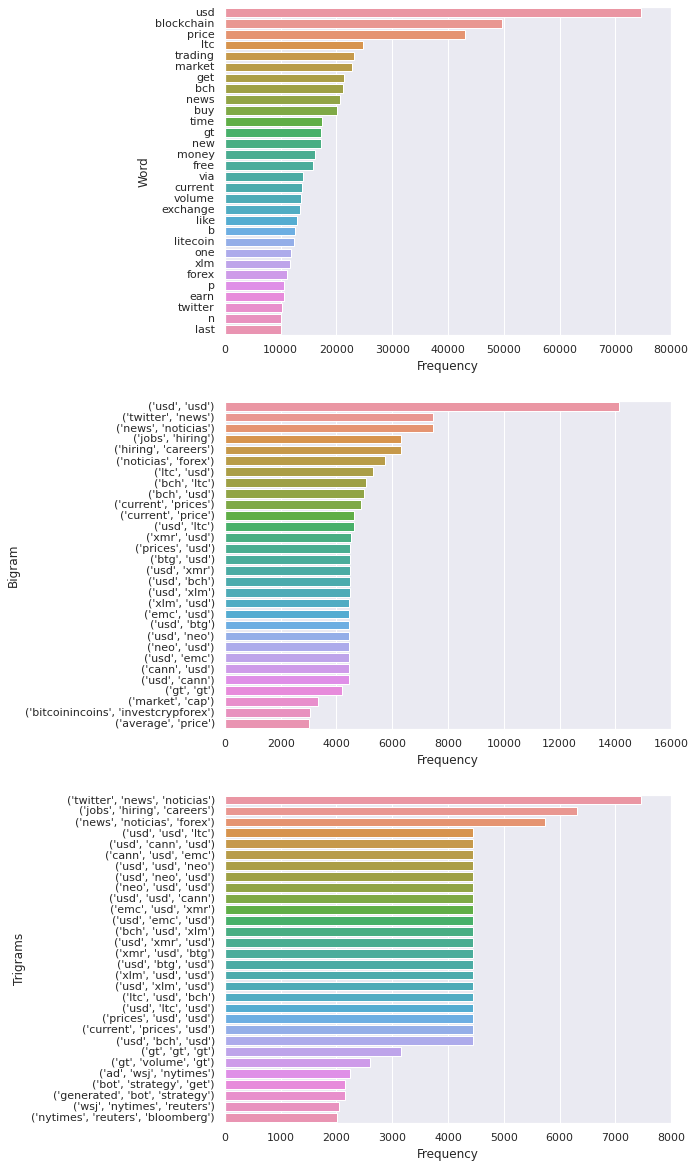

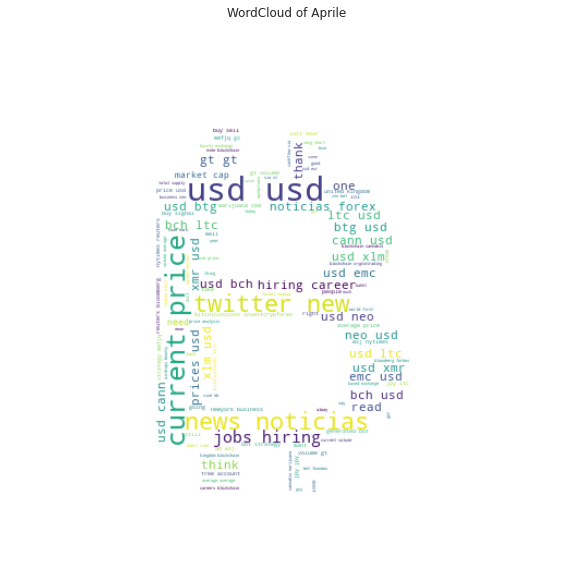

In [ ]:
text_with_nltk(df_aprile['text'], 'Aprile')

# Analisi testo per sentiment

In [ ]:
df_sentiment = pd.read_csv("/gdrive/My Drive/TextAnalytics/datasets/df_tweets_sentiment_2019.csv")
df_sentiment

,date,text,vader_polarity,vader_sentiment,transformers_sentiment
0,2019-05-06 02:25:41,wish token giveaway retweet and like this twee...,0.7351,1,1
1,2019-05-06 02:29:30,wish is a decentralized reward platform powere...,0.9451,1,1
2,2019-05-06 03:34:48,new tasks added to contest enter to win huge c...,0.8442,1,1
3,2019-05-06 05:29:29,achain congrats our community member artemiycr...,0.8625,1,1
4,2019-05-06 05:50:31,join on kingcuan our bot will automatically ma...,0.7506,1,1
...,...,...,...,...,...
518997,2019-09-26 23:57:50,on september daps will make its long awaited t...,0.7884,1,1
518998,2019-09-26 23:58:06,judge denies release of canadian man accused o...,-0.8316,0,0
518999,2019-09-26 23:58:30,dutchsunset alexkjanssen alexcobb this message...,-0.4588,0,0
519000,2019-09-26 23:58:46,pezosaso aaronlevi ltc apompliano changing the...,-0.5994,0,0


## Positivo

In [ ]:
df_pos=df_sentiment[df_sentiment['transformers_sentiment']==1]
#df_pos

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 454669), ('crypto', 150943), ('ETHEREUM', 69830), ('gt', 66429), ('free', 64097), ('blockchain', 51036), ('get', 35117), ('AMP', 31371), ('like', 30024), ('airdrop', 29707)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('gt', 66429), ('free', 64097), ('blockchain', 51036), ('get', 35117), ('like', 30024), ('airdrop', 29707), ('money', 28604), ('best', 24611), ('good', 24516), ('time', 24057)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






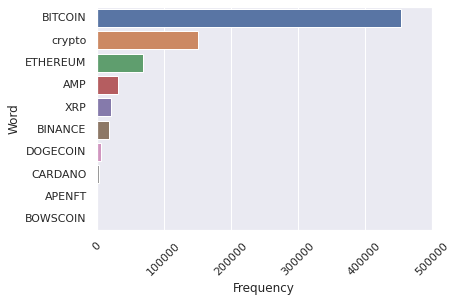

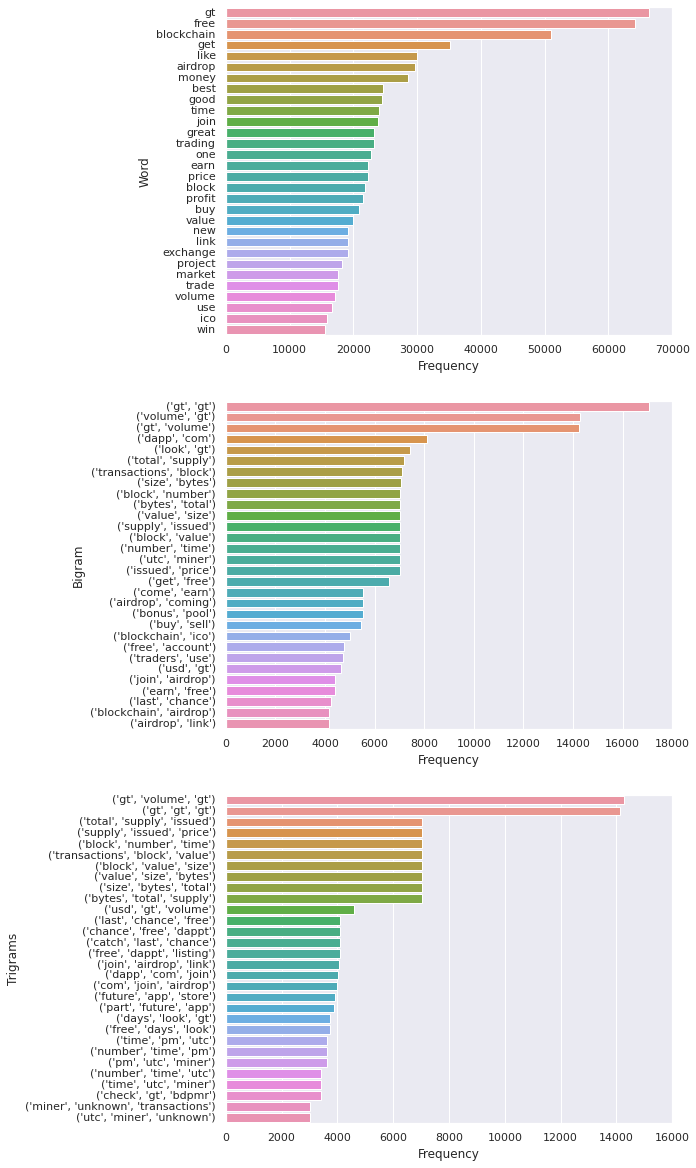

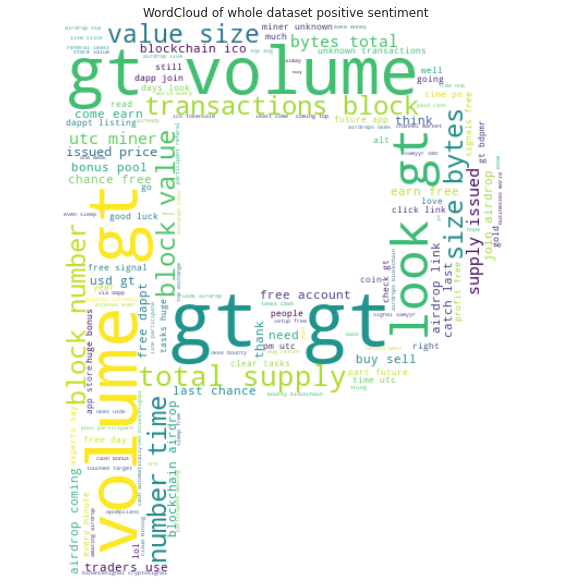

In [ ]:
text_with_nltk(df_pos['text'], 'whole dataset positive sentiment', pos='y')

## Negativo

In [ ]:
df_neg=df_sentiment[df_sentiment['transformers_sentiment']==0]
#df_neg

Mostriamo le prime 10 parole con maggiore frequenza:
[('BITCOIN', 210508), ('crypto', 50524), ('price', 15105), ('st', 14257), ('ETHEREUM', 13990), ('blockchain', 11920), ('XRP', 9681), ('market', 9628), ('people', 9600), ('money', 8804)]
Ci sono alcune parole come bitcoin e crypto che hanno una frequenza così alta da risultare outlier, per questo motivo si eliminano insieme alltre altre valute trovate all'interno del dataset. Prima di fare ciò però mostriamo la loro frequenza.




Mostriamo le prime 10 parole con maggiore frequenza dopo aver eliminato la criptovalute:
[('price', 15105), ('st', 14257), ('blockchain', 11920), ('market', 9628), ('people', 9600), ('money', 8804), ('time', 8626), ('news', 8426), ('last', 8220), ('scam', 7977)]
Procediamo mostrando la frequenze delle prime 30: singole parole, bigrammi, trigrammi:






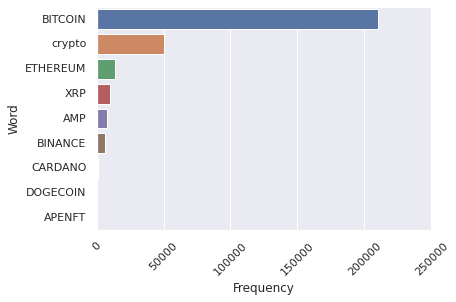

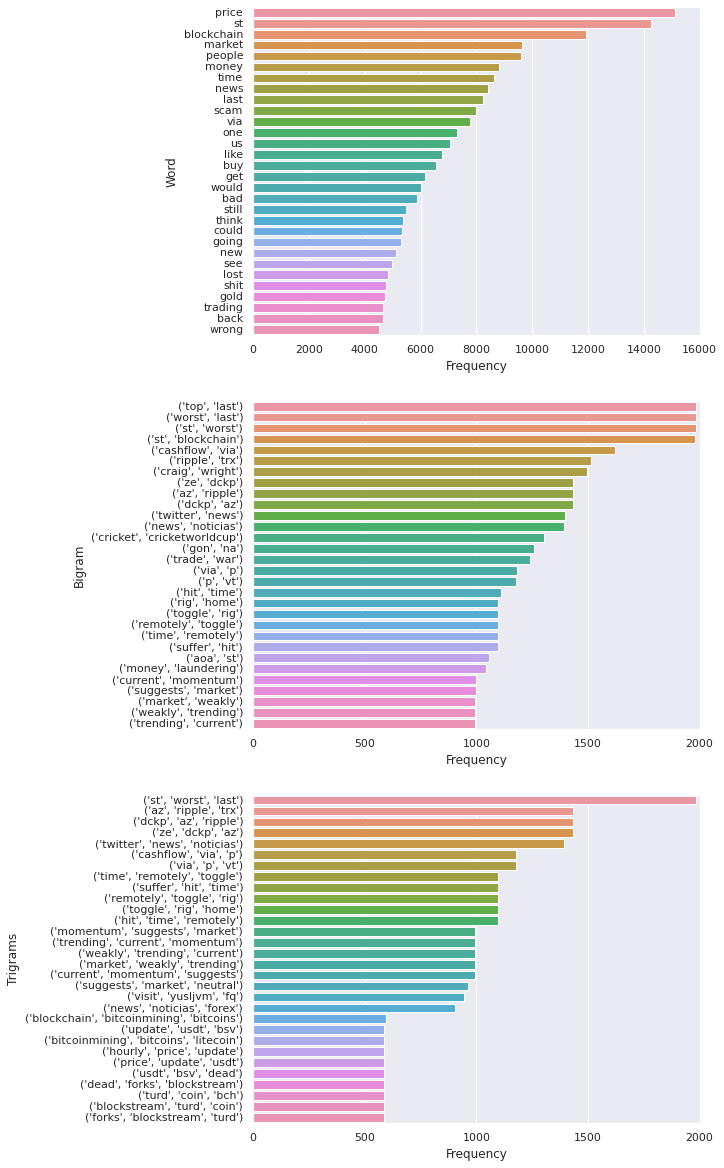

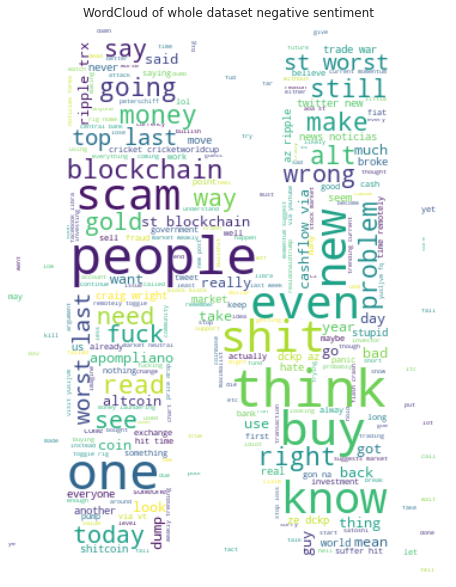

In [ ]:
text_with_nltk(df_neg['text'], 'whole dataset negative sentiment', pos='n')